# TITANIC PREDICTION
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In the 1997 movie of the same name which tells the story of this unfortunate disaster, it was seen that priority was given to women and children to get to the lifeboat first. It was also seen that people from the upper class seemed to get to the lifeboat first. Some predictions will be done with the passenger details to see the survival rate and who was likely to survive.

# Importing Neccesary Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Dataset

In [49]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
### Explanation of Columns
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [52]:
train_data.duplicated().sum()

0

We can see that the Age, cabin amd Embarked columns have missing values. There are no duplicate values. The passengerID column is not needed.

# Unvariate Analysis
First, we will only analyze the independent features. We will try to plot the categorical and the numerical distributions  to see what we can make out from them. Once we are done with this, bivariate and multivariate will  be done in order to have more  understanding and intuition of the data. These analysis will be done in order to see the correlation of the data and to also see the outliers. We will do a countplot of categorical variables then a box and histogram of the numerical variables.

In [53]:
cat_feature_count = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
count_list = list(enumerate(cat_feature_count))

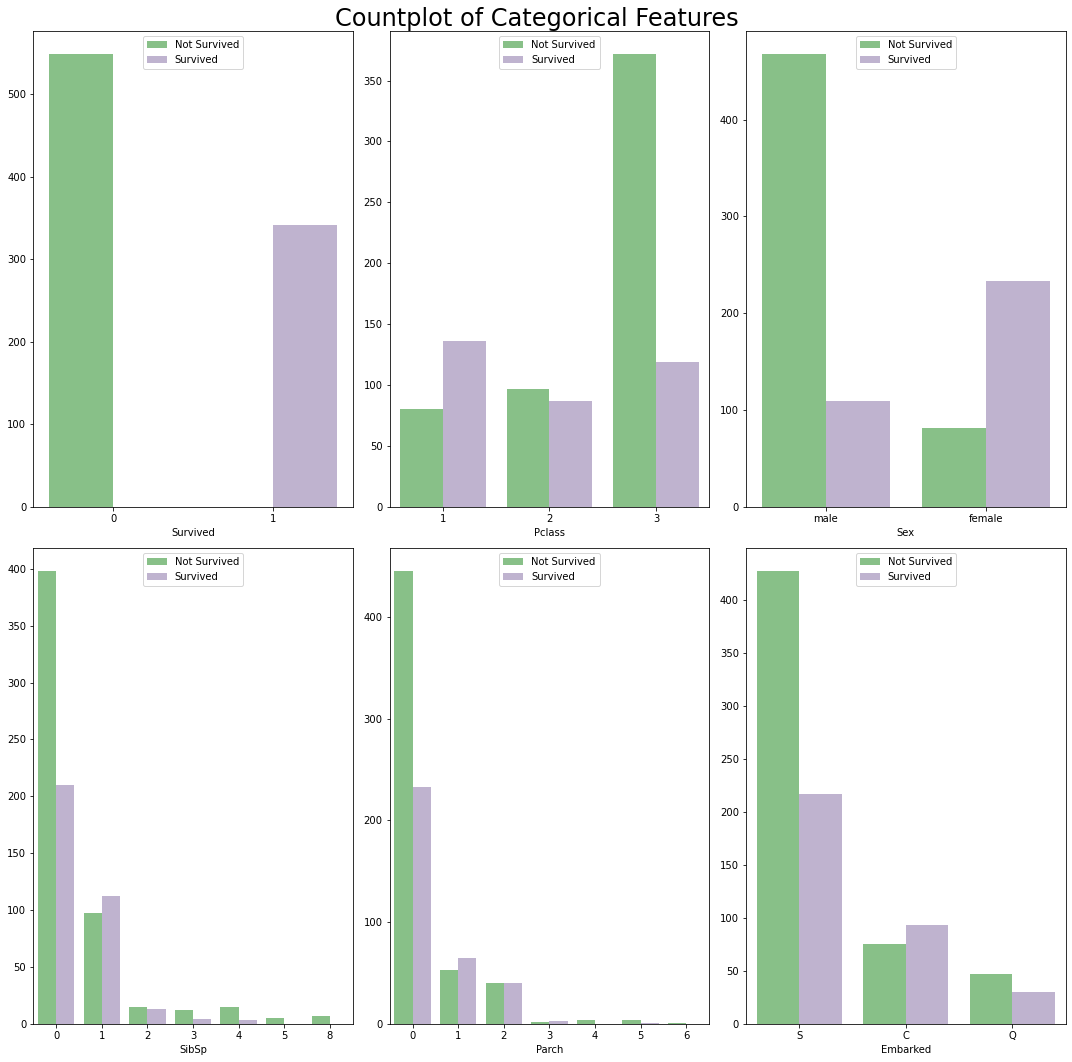

In [54]:
plt.figure(figsize = (15,15))
plt.suptitle("Countplot of Categorical Features", fontsize=24)
for i in count_list: 
    plt.subplot(2,3,i[0]+1)
    sns.countplot(data = train_data, x = i[1], hue = "Survived", palette="Accent")
    plt.ylabel("")
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.tight_layout()
plt.show()

In [55]:
num_feature_count = ["Age", "Fare"]
count_list_1 = list(enumerate(num_feature_count))

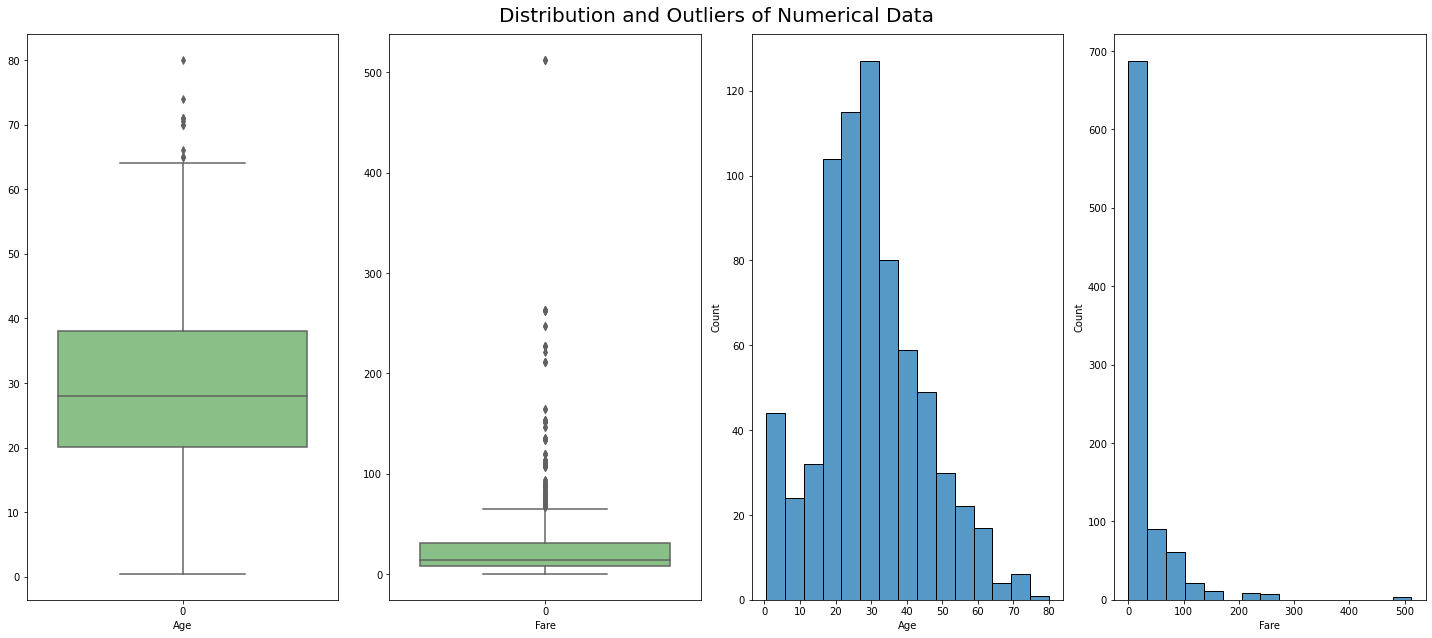

In [56]:
plt.figure(figsize=(20,9))
plt.suptitle("Distribution and Outliers of Numerical Data", fontsize=20)
for i in count_list_1:
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(data = train_data[i[1]], palette="Accent")
    plt.xlabel(str(i[1]))
for i in count_list_1:
    plt.subplot(1,4,i[0]+3)
    sns.histplot(data = train_data[i[1]], palette="Accent", bins=15)
    plt.xlabel(str(i[1]))
plt.tight_layout()
plt.show()

# Bivariate and Multivariate Analysis
Since we now have a better understanding of the independent variable, we will try to learn something new from analysing the relationship between these individual variables and how they are correlated. This will help us in feature engineering and further in selecting an appropriate model for the inference of test data.

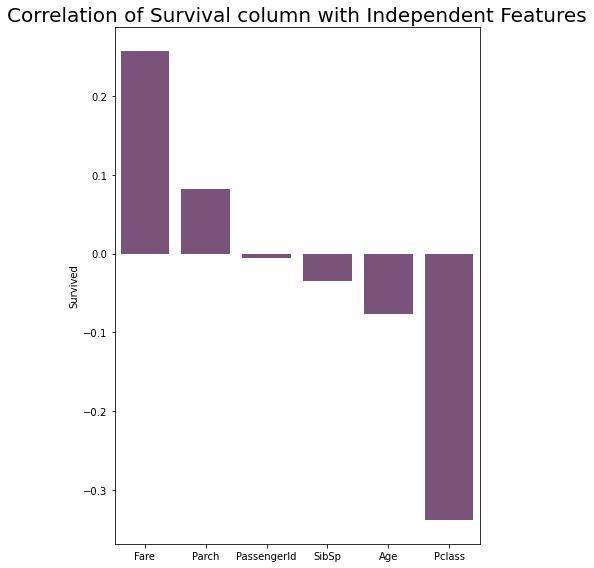

In [57]:
plt.figure(figsize=(6,8))
plt.title("Correlation of Survival column with Independent Features", fontsize=20)
corr = train_data.corr()["Survived"].sort_values(ascending=False)[1:]
sns.barplot(x=corr.index, y=corr, color=(0.50,0.30,0.50))
plt.tight_layout()
plt.show()

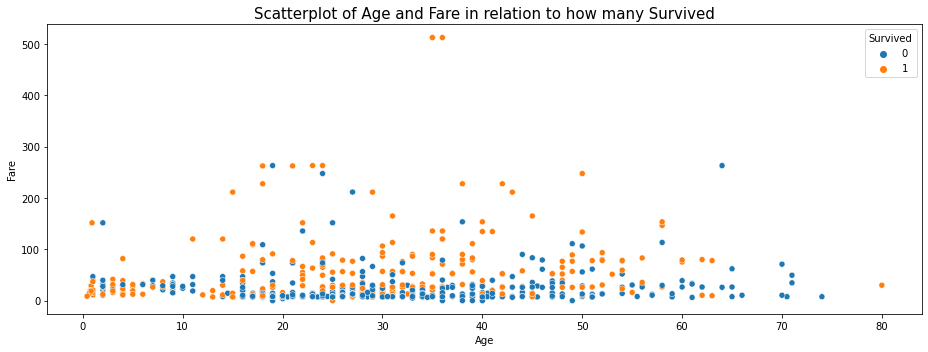

In [58]:
plt.figure(figsize=(13,5))
plt.title("Scatterplot of Age and Fare in relation to how many Survived", fontsize=15)
sns.scatterplot(data = train_data, x = "Age", y="Fare", hue='Survived')
plt.tight_layout()
plt.show()

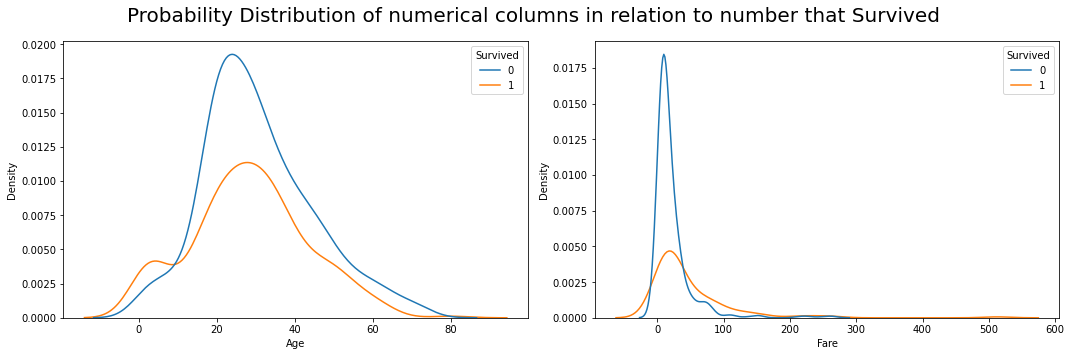

In [59]:
plt.figure(figsize=(15,5))
plt.suptitle("Probability Distribution of numerical columns in relation to number that Survived ", fontsize = 20)
for i in count_list_1:
    plt.subplot(1,2,i[0]+1)
    sns.kdeplot(data=train_data, x=i[1], hue="Survived")
plt.tight_layout()
plt.show()

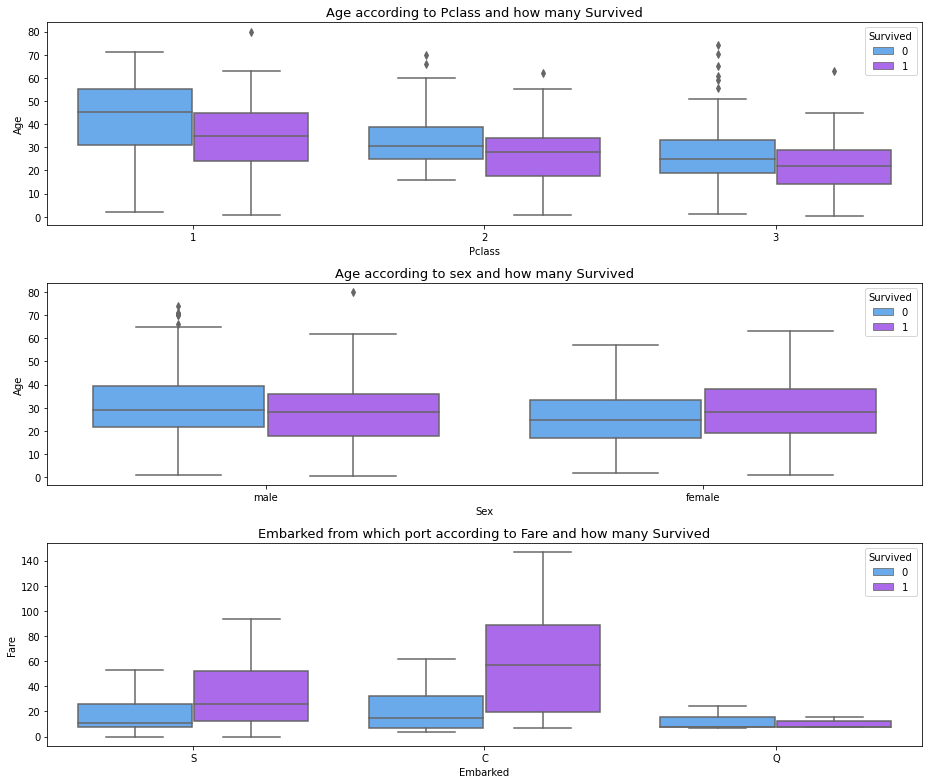

In [60]:
plt.figure(figsize=(13,11))

plt.subplot(3,1,1)
plt.title("Age according to Pclass and how many Survived", fontsize=13)
sns.boxplot(data = train_data, y ="Age", x ="Pclass", hue="Survived", palette="cool")

plt.subplot(3,1,2)
plt.title("Age according to sex and how many Survived", fontsize=13)
sns.boxplot(data = train_data, y ="Age", x ="Sex", hue="Survived", palette="cool")

#Two extreme outliers were ruining the boxplot on the right. Showfliers parameter has been used to remove the outliers of Fare. 
plt.subplot(3,1,3)
plt.title("Embarked from which port according to Fare and how many Survived", fontsize=13)
sns.boxplot(data = train_data, y ="Fare", x ="Embarked", hue="Survived", palette="cool", showfliers=False)

plt.tight_layout()
plt.show()

# Feature Engineering and Model Building using Pipeline

### Train test split
Here we split the train data and also drop irrelevant columns

In [61]:
def drop_irr_col(data):
    data.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)
drop_irr_col(data=train_data)

In [62]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [63]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_data.drop(columns=["Survived"]), train_data["Survived"], 
                                                    test_size=0.47, random_state=42)

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [65]:
x = train_data.isnull().sum()
for a, b in x.items():
    if b > 0:
        print(f"There are {b} missing values in column: {a}")

There are 177 missing values in column: Age
There are 687 missing values in column: Cabin
There are 2 missing values in column: Embarked


We need to handle the missing values in the three columns mentioned above

In [66]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
766,1,male,NaN,0,0,39.600,NaN,C
874,2,female,28.0,1,0,24.000,NaN,C
528,3,male,39.0,0,0,7.925,NaN,S
340,2,male,2.0,1,1,26.000,F2,S
743,3,male,24.0,1,0,16.100,NaN,S


In [67]:
def cabinNullValues(data):
    data["Cabin"].fillna("C", inplace=True)
cabinNullValues(train_X)
cabinNullValues(test_X)

In [68]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
766,1,male,NaN,0,0,39.600,C,C
874,2,female,28.0,1,0,24.000,C,C
528,3,male,39.0,0,0,7.925,C,S
340,2,male,2.0,1,1,26.000,F2,S
743,3,male,24.0,1,0,16.100,C,S


In [69]:
#handling missing values
P1 = ColumnTransformer(transformers=[
    ("AgeImputer", SimpleImputer(), [2]),
    ("EmbarkedImputer", SimpleImputer(strategy="most_frequent"), [-1])
], remainder="passthrough")

In [70]:
#encoding categorical features
P2 = ColumnTransformer(transformers=[
    ("SexEncoder", OrdinalEncoder(), [3]),
    ("EmbarkedOneHot", OneHotEncoder(sparse=False, handle_unknown="ignore"), [1,7])
], remainder="passthrough")

In [71]:
# Scaling
P3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,-1))
])

In [98]:
# Model
P4 = LogisticRegression()

In [99]:
the_pipeline = make_pipeline(P1,P2,P3,P4)

In [100]:
# Show Pipeline

from sklearn import set_config
set_config(display='diagram')

In [101]:
the_pipeline.fit(train_X, train_y)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('AgeImputer', SimpleImputer(),
                                                  [2]),
                                                 ('EmbarkedImputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [-1])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SexEncoder',
                                                  OrdinalEncoder(), [3]),
                                                 ('EmbarkedOneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 7])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, -1, None))])),
                ('logisticregression', LogisticRegression())])

# Accuracy of Prediction and Mean Absolute Error

In [102]:
y_predict = the_pipeline.predict(test_X)

In [104]:
#print(mean_absolute_error(test_y, y_predict)*100)

from sklearn.metrics import accuracy_score
model_accuracy = round(accuracy_score(test_y, y_predict),3)*100
print(f"The accuracy of the model is: {model_accuracy}%")

The accuracy of the model is: 78.8%


In [32]:
print(y_predict)

[0.14515992 0.24470513 0.00313131 1.         0.32       1.
 0.75436106 0.01       0.87833333 1.         0.17       0.65
 0.08       0.02727464 0.         1.         0.095      0.75436106
 0.4        0.05       0.38921429 0.18       0.21416667 0.00313131
 0.03747867 0.09       0.22833333 0.24470513 0.15       0.67
 0.14657991 0.5885     0.         0.064      0.00111111 0.69166667
 0.22       0.75436106 1.         0.03747867 0.03838492 0.22041667
 0.03747867 0.         0.54366667 0.03       0.14657991 0.22838095
 0.38921429 0.21       0.74       1.         0.         0.47
 0.         1.         0.24575549 1.         1.         0.38444444
 0.16022042 1.         1.         0.05767857 0.         1.
 0.15692929 0.29419173 0.77       1.         1.         1.
 0.68571429 1.         0.22838095 0.         0.77111106 1.
 1.         0.06       0.         1.         1.         0.
 0.31       0.03       1.         1.         0.265      0.03747867
 0.63       0.41       0.06       0.         0.037478

In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
y_predict = np.delete(y_predict, 418)

In [ ]:
#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_predict})
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")